Directories size

In [8]:
import os, shutil

train_dir = './dataset/train'
validation_dir = './dataset/val'
test_dir = './dataset/test'
train_glob_red = './dataset/train/glob/red'
train_glob_blue = './dataset/train/glob/blue'
val_glob_red = './dataset/val/glob/red'
val_glob_blue = './dataset/val/glob/blue'
test_glob_red = './dataset/test/glob/red'
test_glob_blue = './dataset/test/glob/blue'
print('total training red images:', len(os.listdir(train_glob_red)))
print('total training blue images:', len(os.listdir(train_glob_blue)))
print('total validation red images:', len(os.listdir(val_glob_red)))
print('total validation blue images:', len(os.listdir(val_glob_blue)))
print('total testing red images:', len(os.listdir(test_glob_red)))
print('total testing blue images:', len(os.listdir(test_glob_blue)))

total training red images: 56
total training blue images: 62
total validation red images: 12
total validation blue images: 13
total testing red images: 13
total testing blue images: 15


Data preprocessing

In [9]:
from keras.utils import image_dataset_from_directory

IMG_SIZE = 150

train_dataset = image_dataset_from_directory(
    train_dir,
    image_size=(IMG_SIZE, IMG_SIZE),
    batch_size=32)

validation_dataset = image_dataset_from_directory(
    validation_dir,
    image_size=(IMG_SIZE, IMG_SIZE),
    batch_size=32)

test_dataset = image_dataset_from_directory(
    test_dir,
    image_size=(IMG_SIZE, IMG_SIZE),
    batch_size=32)

Found 1298 files belonging to 2 classes.


I0000 00:00:1747660830.082035   25783 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 3539 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 4050 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.9


Found 275 files belonging to 2 classes.
Found 296 files belonging to 2 classes.


Shape of each batch

In [10]:
for data_batch, labels_batch in train_dataset:
 print('data batch shape:', data_batch.shape)
 print('labels batch shape:', labels_batch.shape)
 break

data batch shape: (32, 150, 150, 3)
labels batch shape: (32,)


Viewing first 5 images of the first batch

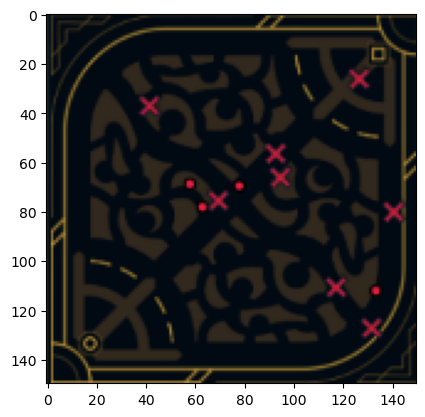

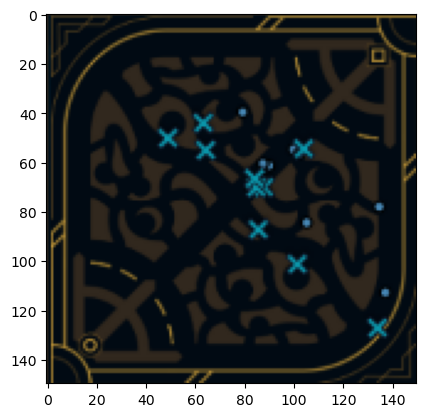

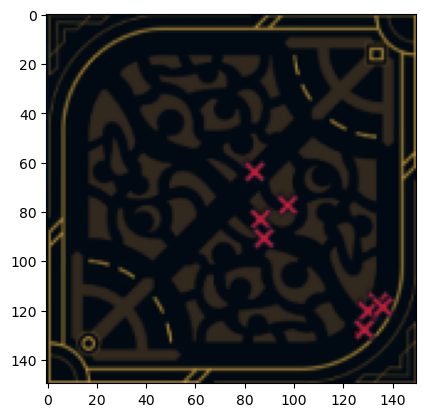

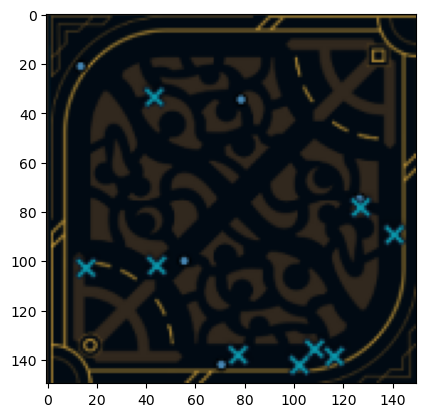

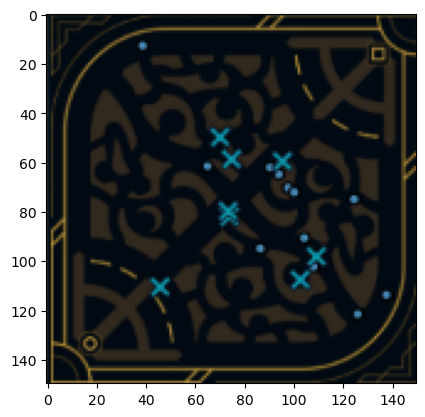

2025-05-19 14:20:47.107913: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [11]:
import matplotlib.pyplot as plt

for data_batch, _ in train_dataset.take(1):
 for i in range(5):
    plt.imshow(data_batch[i].numpy().astype("uint8"))
    plt.show()

Creating NN

In [12]:
from tensorflow import keras
from keras import layers
from keras import models

inputs = keras.Input(shape=(IMG_SIZE, IMG_SIZE, 3))
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Flatten()(x)
x = layers.Dense(512, activation="relu")(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

Compiling NN

In [13]:
import tensorflow as tf
model.compile(
 loss='binary_crossentropy',
 optimizer=tf.keras.optimizers.RMSprop(learning_rate=1e-4),
 metrics=['acc'])

Training the model

In [14]:
history = model.fit(
 train_dataset,
 epochs=30,
 validation_data=validation_dataset)

Epoch 1/30


I0000 00:00:1747660860.075133   33561 service.cc:152] XLA service 0x7f9a60003a00 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1747660860.075216   33561 service.cc:160]   StreamExecutor device (0): NVIDIA GeForce RTX 4050 Laptop GPU, Compute Capability 8.9
2025-05-19 14:21:00.103480: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1747660860.245978   33561 cuda_dnn.cc:529] Loaded cuDNN version 90300


 5/41 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - acc: 0.7622 - loss: 0.6434

I0000 00:00:1747660863.506673   33561 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


41/41 ━━━━━━━━━━━━━━━━━━━━ 9s 126ms/step - acc: 0.8721 - loss: 0.4462 - val_acc: 0.9091 - val_loss: 0.3394
Epoch 2/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - acc: 0.9066 - loss: 0.3421 - val_acc: 0.9091 - val_loss: 0.3238
Epoch 3/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - acc: 0.9098 - loss: 0.3134 - val_acc: 0.9091 - val_loss: 0.3320
Epoch 4/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - acc: 0.9095 - loss: 0.2997 - val_acc: 0.9091 - val_loss: 0.2654
Epoch 5/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - acc: 0.8988 - loss: 0.2869 - val_acc: 0.9091 - val_loss: 0.2148
Epoch 6/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - acc: 0.9144 - loss: 0.2169 - val_acc: 0.9200 - val_loss: 0.1593
Epoch 7/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - acc: 0.9268 - loss: 0.1965 - val_acc: 0.9382 - val_loss: 0.1281
Epoch 8/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - acc: 0.9499 - loss: 0.1417 - val_acc: 0.9345 - val_loss: 0.1276
Epoch 9/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - acc: 0.9505 - loss: 0

Loss and Accuracy

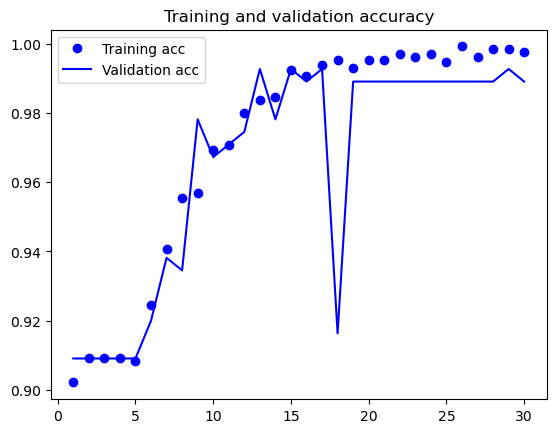

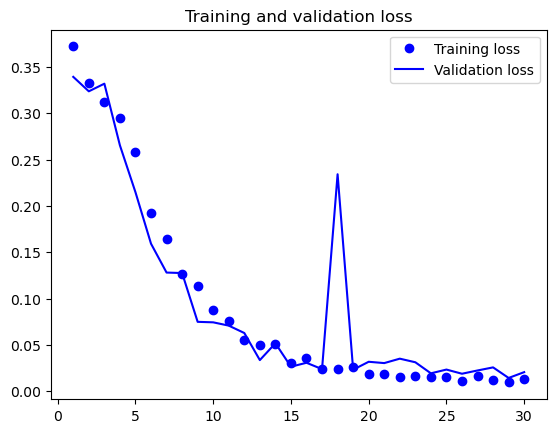

In [15]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()
